# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2

In [21]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

%load_ext nb_black
import warnings

sns.set()
warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [22]:
df = pd.read_csv("grades.csv")

display(df)

,Name,Grades
0,Nilesh,A
1,Jhon,S
2,James,C
3,Ravi,F
4,Sita,S
5,Raju,E
6,Praful,F
7,Ganga,B
8,Ram,A
9,Rahim,S


<IPython.core.display.Javascript object>

In [23]:
# write a function to do Label encoding for grades
def label_encoding_grades(column):
    # Assuming grades to be smilar to IITM
    grade_to_label = {"S": 1, "A": 2, "B": 3, "C": 4, "D": 5, "E": 6, "F": 7}
    Labeled_data = column.apply(lambda x: grade_to_label[x])
    return Labeled_data

<IPython.core.display.Javascript object>

In [24]:
df["Grades"] = label_encoding_grades(df["Grades"])

display(df)

,Name,Grades
0,Nilesh,2
1,Jhon,1
2,James,4
3,Ravi,7
4,Sita,1
5,Raju,6
6,Praful,7
7,Ganga,3
8,Ram,2
9,Rahim,1


<IPython.core.display.Javascript object>

Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [25]:
df = pd.read_csv("color.csv")

display(df)

,Objects,Color
0,Leaves,Green
1,Blood,Red
2,Sea,Blue
3,Rose,Red
4,Sun flower,Yellow
5,Apple,Red
6,Mango,Yellow
7,Banana,Yellow


<IPython.core.display.Javascript object>

Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [26]:
# Answer

df = df.join(pd.get_dummies(df["Color"]))
df_enc = df.drop("Color", axis=1)
display(df_enc)

,Objects,Blue,Green,Red,Yellow
0,Leaves,0,1,0,0
1,Blood,0,0,1,0
2,Sea,1,0,0,0
3,Rose,0,0,1,0
4,Sun flower,0,0,0,1
5,Apple,0,0,1,0
6,Mango,0,0,0,1
7,Banana,0,0,0,1


<IPython.core.display.Javascript object>

Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


## Answers : 
- The categories for the first dataset 'grades.csv' are the grades (S,A,B,C,D,E,F). In the second dataset, the categories are ('Green','Yellow','Red')
- The categories in the grades column are ordinal, i.e. they have inherent order among them , with S being the first and F being the last. There is no inherent relationship present like this in color other than the fact that they try to denote a property in the same category (color).
- For grades we can use label encoding which works since the data is ordinal. But for colors, one hot encoding is preffered.

# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [27]:
def computeCost(X, y, theta, lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n+1 features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly

    J = np.sum((np.matmul(X, theta) - y) ** 2) / (2 * len(y)) + lamda * np.sum(
        theta.flatten() ** 2
    )

    return J

<IPython.core.display.Javascript object>

In [28]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10, max_iters=1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values

    J_history = []

    flag = True
    m = len(y)
    J_old = computeCost(X_appended, y, theta, lamda) + 1
    J = computeCost(X_appended, y, theta, lamda)

    count = 0
    J_history.append(J)
    for i in range(max_iters):
        J_old = J
        theta = (
            theta
            - alpha
            / m
            * np.sum(
                np.matmul(X_appended.T, (np.matmul(X_appended, theta) - y)), axis=1
            ).reshape(X_appended.shape[1], 1)
            - 2 * alpha * lamda * theta
        )
        J = computeCost(X_appended, y, theta, lamda)
        J_history.append(J)
        count += 1

    cost = computeCost(X_appended, y, theta, lamda)

    return theta, J_history, cost

<IPython.core.display.Javascript object>

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [29]:
import numpy as np
from matplotlib import pyplot as plt

data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

<IPython.core.display.Javascript object>

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

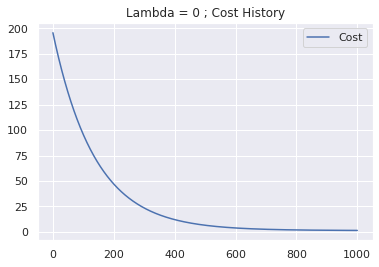

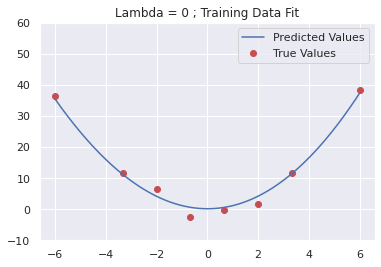

Train Error =  3.024090403498155


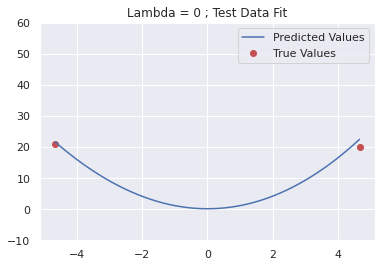

Error =  3.100486736883266


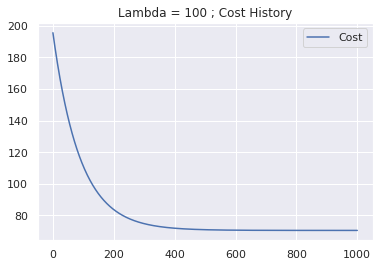

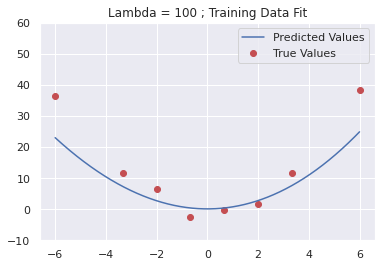

Train Error =  52.69390307902931


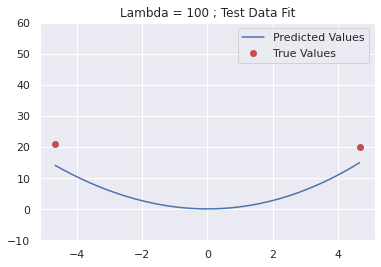

Error =  37.27198029758644


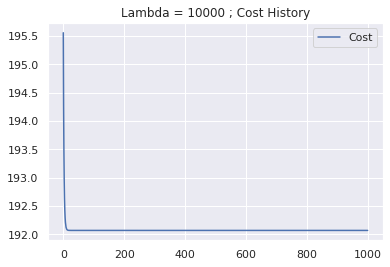

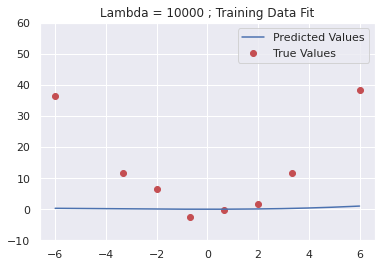

Train Error =  377.3176920833379


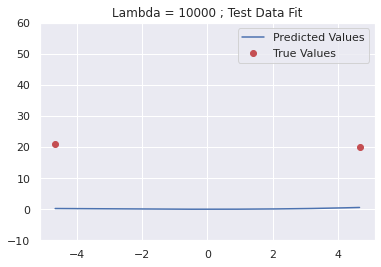

Error =  407.5688115890961


<IPython.core.display.Javascript object>

In [113]:
# Write you code Here

X_train = data["X_train"].reshape(-1, 1)
y_train = data["y_train"].reshape(-1, 1)
X_test = data_test["X_test"].reshape(-1, 1)
y_test = data_test["y_test"].reshape(-1, 1)

poly = PolynomialFeatures(degree=3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)

X_train_app = np.hstack((np.ones(X_train_3.shape, dtype=X_train_3.dtype), X_train_3))
X_test_app = np.hstack((np.ones(X_test_3.shape, dtype=X_test_3.dtype), X_test_3))


lamdas = [0, 100, 10000]
alpha = 0.00001
max_iters = 1000

train_err = []
test_err = []

for l in lamdas:
    theta = np.zeros((X_train_app.shape[1], 1))
    theta, J_history, cost = gradientDescent(X_train_app, y_train, theta, alpha, l)

    plt.title("Lambda = " + str(l) + " ; Cost History")
    plt.plot(J_history, label="Cost")
    plt.legend()
    plt.show()
    plt.title("Lambda = " + str(l) + " ; Training Data Fit")
    plt.ylim([-10, 60])

    plt.scatter(X_train, y_train, c="r", label="True Values")
    X_r = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)

    X_r_3 = poly.fit_transform(X_r)
    X_r_app = np.hstack((np.ones(X_r_3.shape, dtype=X_r_3.dtype), X_r_3))

    plt.plot(X_r, np.matmul(X_r_app, theta), label="Predicted Values")
    plt.legend()
    plt.show()

    train_err.append(mean_squared_error(y_train, np.matmul(X_train_app, theta)))
    print("Train Error = ", train_err[-1])

    plt.title("Lambda = " + str(l) + " ; Test Data Fit")
    plt.ylim([-10, 60])
    plt.scatter(X_test, y_test, c="r", label="True Values")
    X_r = np.linspace(X_test.min(), X_test.max(), 1000).reshape(-1, 1)

    X_r_3 = poly.fit_transform(X_r)
    X_r_app = np.hstack((np.ones(X_r_3.shape, dtype=X_r_3.dtype), X_r_3))

    plt.plot(X_r, np.matmul(X_r_app, theta), label="Predicted Values")
    plt.legend()
    plt.show()

    test_err.append(mean_squared_error(y_test, np.matmul(X_test_app, theta)))
    print("Error = ", test_err[-1])

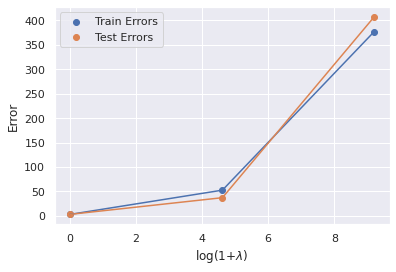

<IPython.core.display.Javascript object>

In [114]:
plt.scatter(np.log(1 + np.array(lamdas)), train_err, label="Train Errors")
plt.plot(np.log(1 + np.array(lamdas)), train_err)
plt.scatter(np.log(1 + np.array(lamdas)), test_err, label="Test Errors")
plt.plot(np.log(1 + np.array(lamdas)), test_err)

plt.xlabel(r"log(1+$\lambda$)")
plt.ylabel("Error")
plt.legend()
plt.show()

As $\lambda$ increases, the model begins to fit the training datapoints with lower accuracy and becomes less complex. This is since the value of $\lambda$ is directly correlated to how much the magnitude of the parameters contribute to the function, thus increasing $\lambda$ tends to reduce the params values as a whole and causes the model to become less complex.

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models

In the following exercises you can use inbuilt regressionn functions from sklearn

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

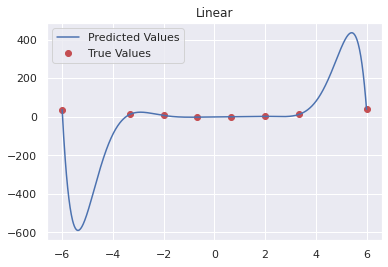

Train Error :  1.3301575987490832e-17


<IPython.core.display.Javascript object>

In [132]:
def regression(X, Y, reg_type="ridge", degree=9, alpha=0.1):
    """ 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    """

    if reg_type == "linear":
        model = LinearRegression(fit_intercept=False)
    elif reg_type == "lasso":
        model = Lasso(alpha=alpha, fit_intercept=False)
    elif reg_type == "ridge":
        model = Ridge(alpha=alpha, fit_intercept=False)

    model.fit(X, Y)

    Y_hat = model.predict(X)

    mse = mean_squared_error(Y_hat, Y)

    return Y_hat, mse, model


# Plotting and calling the function

plt.title("Linear")
plt.scatter(X_train, y_train, c="r", label="True Values")

X_train_9 = PolynomialFeatures(9).fit_transform(X_train)
_, mse, model = regression(X=X_train_9, Y=y_train, reg_type="linear", degree=9)

X_r = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
X_r_9 = PolynomialFeatures(9).fit_transform(X_r)

plt.plot(X_r, model.predict(X_r_9), label="Predicted Values")
plt.legend()
plt.show()

print("Train Error : ", mse)

The model seems to be overfitting the data, since the fit looks to be fitting each prediction with zero error.

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

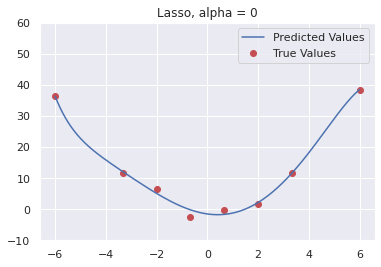

Train Error :  1.2214911721297093


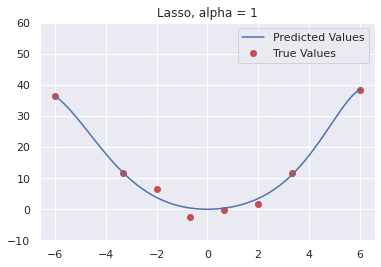

Train Error :  2.414737534134998


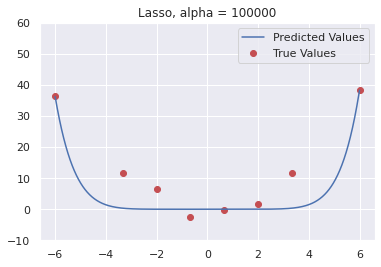

Train Error :  38.776509152880536


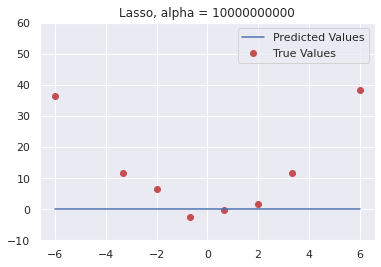

Train Error :  391.110207672108


Lasso Coefficients : 


,0,1,100000,10000000000
0,-1.517712e+00,-0.000000e+00,0.000000e+00,0.0
1,-1.145507e+00,-0.000000e+00,-0.000000e+00,0.0
2,1.337894e+00,8.084939e-01,0.000000e+00,0.0
3,1.059994e-01,-2.854683e-02,-0.000000e+00,0.0
4,-1.346312e-02,2.503015e-02,0.000000e+00,0.0
5,-4.773709e-04,1.777478e-03,0.000000e+00,0.0
6,1.119182e-04,-3.906922e-04,0.000000e+00,0.0
7,-2.839963e-05,-1.303986e-05,0.000000e+00,0.0
8,1.785955e-06,-3.508899e-06,2.219951e-05,0.0
9,-3.253649e-07,-2.900136e-07,1.032789e-07,0.0


<IPython.core.display.Javascript object>

In [122]:
# Write your code here, plot the prediction on the train data, and print the coefficients learned for ridge and lasso
# You can combine both Ridge and Lasso, But for Train error vs Lambda, plot them seperately for lasso and ridge

lamdas = [0, 1, 10 ** 5, 10 ** 10]

# Lasso

lasso_errs = []
coeffs = {}
for l in lamdas:
    plt.ylim([-10, 60])
    plt.scatter(X_train, y_train, c="r", label="True Values")
    X_train_9 = PolynomialFeatures(9).fit_transform(X_train)

    _, mse, model = regression(
        X=X_train_9, Y=y_train, reg_type="lasso", degree=9, alpha=l
    )
    plt.title("Lasso, alpha = " + str(l))
    X_r = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
    X_r_9 = PolynomialFeatures(9).fit_transform(X_r)

    plt.plot(X_r, model.predict(X_r_9), label="Predicted Values")
    plt.legend()
    plt.show()

    print("Train Error : ", mse)
    lasso_errs.append(mse)

    coeff = {}
    for i in range(10):
        coeff[i] = model.coef_[i]
    coeffs[l] = coeff

print("\n\nLasso Coefficients : ")
display(pd.DataFrame(coeffs))

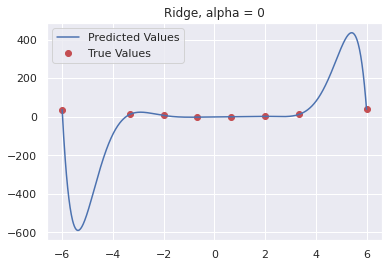

Train Error :  6.283127129038168e-16


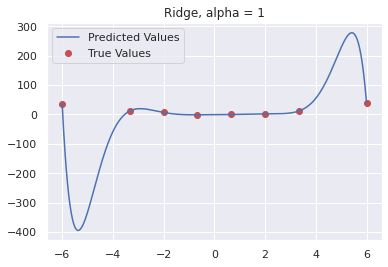

Train Error :  0.14597117141231414


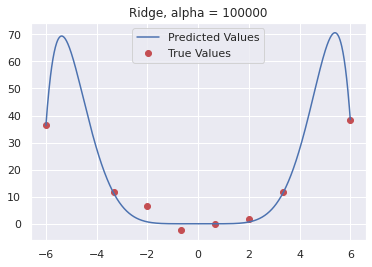

Train Error :  5.364848908951051


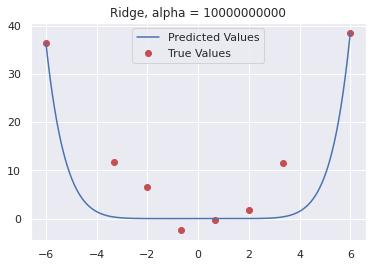

Train Error :  38.74736823680782


Lasso Coefficients : 


,0,1,100000,10000000000
0,-1.330195,-0.889415,5.180872e-05,2.835756e-09
1,1.553134,0.744093,-7.444815e-05,-8.419445e-10
2,-0.297429,-0.162055,3.547114e-04,2.816907e-08
3,0.442676,0.192015,-3.106447e-04,-4.102932e-09
4,0.636882,0.537173,1.974410e-03,2.835172e-07
5,-0.454834,-0.278410,-8.543537e-04,-1.857292e-08
6,-0.058291,-0.048545,1.130670e-02,2.813993e-06
7,0.046897,0.029814,6.179089e-05,-8.151447e-08
8,0.001157,0.000960,-2.933241e-04,2.222350e-05
9,-0.000962,-0.000618,-9.432029e-07,1.094908e-07


<IPython.core.display.Javascript object>

In [123]:
# Ridge

ridge_errs = []
for l in lamdas:
    plt.scatter(X_train, y_train, c="r", label="True Values")
    X_train_9 = PolynomialFeatures(9).fit_transform(X_train)

    _, mse, model = regression(
        X=X_train_9, Y=y_train, reg_type="ridge", degree=9, alpha=l
    )
    plt.title("Ridge, alpha = " + str(l))
    X_r = np.linspace(X_train.min(), X_train.max(), 1000).reshape(-1, 1)
    X_r_9 = PolynomialFeatures(9).fit_transform(X_r)

    plt.plot(X_r, model.predict(X_r_9), label="Predicted Values")
    plt.legend()
    plt.show()
    print("Train Error : ", mse)
    ridge_errs.append(mse)
    coeff = {}
    for i in range(10):
        coeff[i] = model.coef_[0][i]
    coeffs[l] = coeff

print("\n\nLasso Coefficients : ")
display(pd.DataFrame(coeffs))

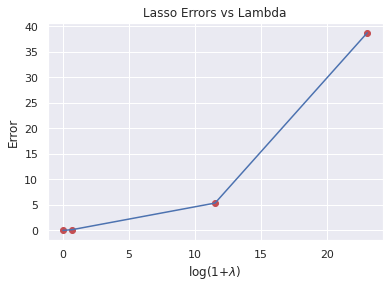

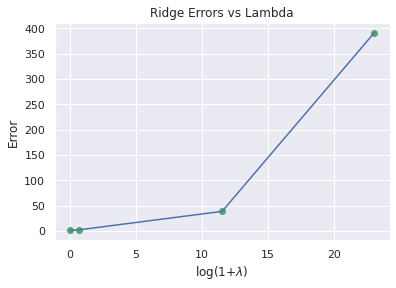

<IPython.core.display.Javascript object>

In [124]:
plt.title("Lasso Errors vs Lambda")
plt.xlabel(r"log(1+$\lambda$)")
plt.ylabel("Error")
plt.plot(np.log([1 + i for i in lamdas]), ridge_errs)
plt.scatter(np.log([1 + i for i in lamdas]), ridge_errs, c="r")
plt.show()
plt.title("Ridge Errors vs Lambda")
plt.xlabel(r"log(1+$\lambda$)")
plt.ylabel("Error")
plt.plot(np.log([1 + i for i in lamdas]), lasso_errs)
plt.scatter(np.log([1 + i for i in lamdas]), lasso_errs, c="g")
plt.show()

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

In [125]:
# write your code here

lasso_errs = []
lasso_coeffs = {}
ridge_errs = []
ridge_coeffs = {}

for l in lamdas:
    X_train_9 = PolynomialFeatures(9).fit_transform(X_train)

    _, mse, model = regression(
        X=X_train_9, Y=y_train, reg_type="lasso", degree=9, alpha=l
    )
    lasso_errs.append(
        mean_squared_error(
            y_test, model.predict(PolynomialFeatures(9).fit_transform(X_test))
        )
    )
    coeff = {}
    for i in range(10):
        coeff[i] = model.coef_[i]

    lasso_coeffs[l] = coeff
    _, mse, model = regression(
        X=X_train_9, Y=y_train, reg_type="ridge", degree=9, alpha=l
    )
    ridge_errs.append(
        mean_squared_error(
            y_test, model.predict(PolynomialFeatures(9).fit_transform(X_test)),
        )
    )
    coeff = {}
    for i in range(10):
        coeff[i] = model.coef_[0][i]
    ridge_coeffs[l] = coeff

<IPython.core.display.Javascript object>

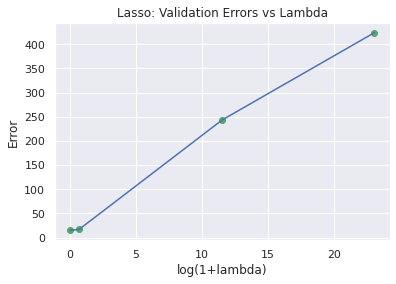



Lasso Coefficients : 


,0,1,100000,10000000000
0,-1.517712e+00,-0.000000e+00,0.000000e+00,0.0
1,-1.145507e+00,-0.000000e+00,-0.000000e+00,0.0
2,1.337894e+00,8.084939e-01,0.000000e+00,0.0
3,1.059994e-01,-2.854683e-02,-0.000000e+00,0.0
4,-1.346312e-02,2.503015e-02,0.000000e+00,0.0
5,-4.773709e-04,1.777478e-03,0.000000e+00,0.0
6,1.119182e-04,-3.906922e-04,0.000000e+00,0.0
7,-2.839963e-05,-1.303986e-05,0.000000e+00,0.0
8,1.785955e-06,-3.508899e-06,2.219951e-05,0.0
9,-3.253649e-07,-2.900136e-07,1.032789e-07,0.0


<IPython.core.display.Javascript object>

In [129]:
plt.title("Lasso: Validation Errors vs Lambda")
plt.xlabel("log(1+lambda)")
plt.ylabel("Error")
plt.plot(np.log([1 + i for i in lamdas]), lasso_errs)
plt.scatter(np.log([1 + i for i in lamdas]), lasso_errs, c="g")
plt.show()


print("\n\nLasso Coefficients : ")
display(pd.DataFrame(lasso_coeffs))

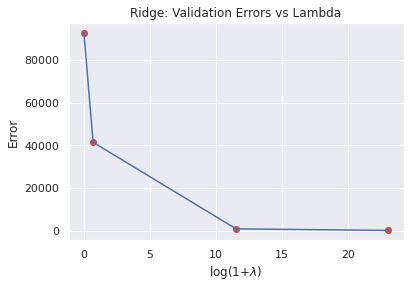



Ridge Coefficients : 


,0,1,100000,10000000000
0,-1.330195,-0.889415,5.180872e-05,2.835756e-09
1,1.553134,0.744093,-7.444815e-05,-8.419445e-10
2,-0.297429,-0.162055,3.547114e-04,2.816907e-08
3,0.442676,0.192015,-3.106447e-04,-4.102932e-09
4,0.636882,0.537173,1.974410e-03,2.835172e-07
5,-0.454834,-0.278410,-8.543537e-04,-1.857292e-08
6,-0.058291,-0.048545,1.130670e-02,2.813993e-06
7,0.046897,0.029814,6.179089e-05,-8.151447e-08
8,0.001157,0.000960,-2.933241e-04,2.222350e-05
9,-0.000962,-0.000618,-9.432029e-07,1.094908e-07


<IPython.core.display.Javascript object>

In [131]:
plt.title("Ridge: Validation Errors vs Lambda")
plt.xlabel(r"log(1+$\lambda$)")
plt.ylabel("Error")
plt.plot(np.log([1 + i for i in lamdas]), ridge_errs)
plt.scatter(np.log([1 + i for i in lamdas]), ridge_errs, c="r")
plt.show()
print("\n\nRidge Coefficients : ")
display(pd.DataFrame(ridge_coeffs))

## Observations on coefficients

- From the coefficients data, we can see that as we increase the regularization parameters, the coefficients values seem to be decreasing
- In the case of lasso regression, some of the coefficients become zero for very high value of lambda (the feature selection property of lasso regression) but for ridge regression, the coefficients do not seem to go to zero for high values of lambda.

### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: The simple linear regression model without regularization fits the dataset in a extremely complicated fashion when a degree of 9 is used. This phenomenon is because the model, due to its highly complex nature (9th degree) tries to fit the noise in the data also, which causes the model to assume an extremely complicated fit for the given datapoints which is wrong.
-  As value of lambda increases what happens to the model complexity?

Ans: As the value of lambda increases, both in ridge and lasso, the model complexity starts to decrease, which is shown by the plots given above.

- What can be infered from the mean squared error versus lambda?

Ans: As the lambda increased in our custom linear regression model, the mean square error increased since the model started to poorly fit the training data as the lambda value increases.

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: True, Regularization gives finer control over fitting the data than using just change of degree of the polynomial features since the degree by which you can vary the regularization parameter is more finer than what you can change the polynomial degree. Thus we can assume the polynomial degree to be the main tuning parameter of model, and regularization as the fine tuning parameter of the model.

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?

Ans: The training mean squared error increases with increase in $\lambda$ since the model complexity starts to decrease on increasing $\lambda$. The validation error varies in a indirect fashion with respect to $\lambda$, which depends on the complexity of the model. Too low an $\lambda$ value and too high a $\lambda$ value causes high validation mean squared error, and a decent range of $\lambda$ decreases the validation mean square error, if the non-regularized model was overfitting on training dataset.
